In [17]:
import keras

In [18]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [19]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [20]:
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
from keras.layers import Input, Dense, BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    input_layer = Input(input_shape)
    
    for i, num_unit in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=num_unit, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = Dense(units=num_unit, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
    out = Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [22]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [35]:
# 載入 Callbacks, 並將 monitor 設定為監控 validation loss
from keras.callbacks import ReduceLROnPlateau
optimizer_set=[keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM),
               keras.optimizers.Adam(lr=LEARNING_RATE),
               keras.optimizers.RMSprop(lr=LEARNING_RATE)]

reduce_lr_factor = [0.3,0.5,0.7]

redice_lr_patient = [4,7,10]

In [49]:
import itertools
results={}
for i,(opt, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set,reduce_lr_factor,redice_lr_patient)):
    print('Number of exp:%i, reduce_factor:%.2f, reduce_patient:%i'%(i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, min_lr=1e-12, monitor='val_loss',
                                  patience=reduce_patient, verbose=1)
    model.fit(x_train,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test,y_test),
             shuffle=True, callbacks=[reduce_lr])
    
    exp_name_tag=('exp-%s'%str(i))
    results[exp_name_tag]={'train-loss':model.history.history['loss'],
                           'valid-loss':model.history.history['val_loss'],
                           'train-acc':model.history.history['acc'],
                           'valid-acc':model.history.history['val_acc']}

Number of exp:0, reduce_factor:0.30, reduce_patient:4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_103 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_104 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_10

50000/50000 [==============================] - 7s 131us/step - loss: 2.8049 - acc: 0.1262 - val_loss: 2.8015 - val_acc: 0.1311
Epoch 50/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.8000 - acc: 0.1275 - val_loss: 2.7985 - val_acc: 0.1315
Number of exp:1, reduce_factor:0.30, reduce_patient:7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_106 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_

50000/50000 [==============================] - 7s 131us/step - loss: 2.8374 - acc: 0.1335 - val_loss: 2.8400 - val_acc: 0.1315
Epoch 48/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.8336 - acc: 0.1350 - val_loss: 2.8369 - val_acc: 0.1319
Epoch 49/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.8307 - acc: 0.1340 - val_loss: 2.8336 - val_acc: 0.1324
Epoch 50/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.8271 - acc: 0.1356 - val_loss: 2.8306 - val_acc: 0.1329
Number of exp:2, reduce_factor:0.30, reduce_patient:10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch

50000/50000 [==============================] - 7s 135us/step - loss: 2.9304 - acc: 0.1117 - val_loss: 2.9259 - val_acc: 0.1146
Epoch 46/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.9265 - acc: 0.1123 - val_loss: 2.9220 - val_acc: 0.1147
Epoch 47/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.9226 - acc: 0.1131 - val_loss: 2.9182 - val_acc: 0.1155
Epoch 48/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.9186 - acc: 0.1134 - val_loss: 2.9143 - val_acc: 0.1156
Epoch 49/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.9141 - acc: 0.1130 - val_loss: 2.9106 - val_acc: 0.1167
Epoch 50/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.9113 - acc: 0.1142 - val_loss: 2.9067 - val_acc: 0.1173
Number of exp:3, reduce_factor:0.50, reduce_patient:4
_________________________________________________________________
Layer (type)                 Output Shape              Par

50000/50000 [==============================] - 8s 163us/step - loss: 2.7380 - acc: 0.1354 - val_loss: 2.7290 - val_acc: 0.1391
Epoch 44/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.7354 - acc: 0.1359 - val_loss: 2.7264 - val_acc: 0.1393
Epoch 45/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.7318 - acc: 0.1360 - val_loss: 2.7238 - val_acc: 0.1392
Epoch 46/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.7296 - acc: 0.1368 - val_loss: 2.7210 - val_acc: 0.1396
Epoch 47/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.7267 - acc: 0.1371 - val_loss: 2.7185 - val_acc: 0.1397
Epoch 48/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.7250 - acc: 0.1390 - val_loss: 2.7159 - val_acc: 0.1401
Epoch 49/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.7210 - acc: 0.1386 - val_loss: 2.7134 - val_acc: 0.1403
Epoch 50/50
50000/50000 [==============

50000/50000 [==============================] - 7s 138us/step - loss: 2.6909 - acc: 0.1488 - val_loss: 2.7047 - val_acc: 0.1416
Epoch 42/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.6881 - acc: 0.1479 - val_loss: 2.7019 - val_acc: 0.1415
Epoch 43/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.6857 - acc: 0.1485 - val_loss: 2.6990 - val_acc: 0.1419
Epoch 44/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.6823 - acc: 0.1504 - val_loss: 2.6961 - val_acc: 0.1431
Epoch 45/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.6794 - acc: 0.1513 - val_loss: 2.6934 - val_acc: 0.1436
Epoch 46/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.6760 - acc: 0.1513 - val_loss: 2.6907 - val_acc: 0.1448
Epoch 47/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.6730 - acc: 0.1519 - val_loss: 2.6878 - val_acc: 0.1450
Epoch 48/50
50000/50000 [==============

50000/50000 [==============================] - 7s 135us/step - loss: 2.8718 - acc: 0.1231 - val_loss: 2.8403 - val_acc: 0.1223
Epoch 40/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.8678 - acc: 0.1227 - val_loss: 2.8363 - val_acc: 0.1232
Epoch 41/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.8635 - acc: 0.1241 - val_loss: 2.8327 - val_acc: 0.1238
Epoch 42/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.8601 - acc: 0.1244 - val_loss: 2.8288 - val_acc: 0.1246
Epoch 43/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.8546 - acc: 0.1249 - val_loss: 2.8250 - val_acc: 0.1250
Epoch 44/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.8511 - acc: 0.1261 - val_loss: 2.8213 - val_acc: 0.1252
Epoch 45/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.8478 - acc: 0.1262 - val_loss: 2.8174 - val_acc: 0.1253
Epoch 46/50
50000/50000 [==============

50000/50000 [==============================] - 7s 136us/step - loss: 2.9259 - acc: 0.1067 - val_loss: 2.9134 - val_acc: 0.1080
Epoch 38/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.9221 - acc: 0.1070 - val_loss: 2.9096 - val_acc: 0.1088
Epoch 39/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.9175 - acc: 0.1077 - val_loss: 2.9059 - val_acc: 0.1091
Epoch 40/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.9133 - acc: 0.1077 - val_loss: 2.9023 - val_acc: 0.1095
Epoch 41/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.9099 - acc: 0.1079 - val_loss: 2.8984 - val_acc: 0.1096
Epoch 42/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.9072 - acc: 0.1091 - val_loss: 2.8949 - val_acc: 0.1097
Epoch 43/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.9024 - acc: 0.1101 - val_loss: 2.8916 - val_acc: 0.1107
Epoch 44/50
50000/50000 [==============

50000/50000 [==============================] - 7s 147us/step - loss: 2.8604 - acc: 0.1230 - val_loss: 2.8576 - val_acc: 0.1217
Epoch 36/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.8562 - acc: 0.1223 - val_loss: 2.8535 - val_acc: 0.1218
Epoch 37/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.8518 - acc: 0.1236 - val_loss: 2.8493 - val_acc: 0.1225
Epoch 38/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.8486 - acc: 0.1237 - val_loss: 2.8456 - val_acc: 0.1236
Epoch 39/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.8434 - acc: 0.1243 - val_loss: 2.8418 - val_acc: 0.1239
Epoch 40/50
50000/50000 [==============================] - 7s 150us/step - loss: 2.8405 - acc: 0.1253 - val_loss: 2.8379 - val_acc: 0.1243
Epoch 41/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.8363 - acc: 0.1258 - val_loss: 2.8340 - val_acc: 0.1246
Epoch 42/50
50000/50000 [==============

50000/50000 [==============================] - 7s 144us/step - loss: 2.9461 - acc: 0.1207 - val_loss: 2.9328 - val_acc: 0.1302
Epoch 34/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.9422 - acc: 0.1208 - val_loss: 2.9290 - val_acc: 0.1307
Epoch 35/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.9376 - acc: 0.1215 - val_loss: 2.9250 - val_acc: 0.1315
Epoch 36/50
50000/50000 [==============================] - 7s 150us/step - loss: 2.9336 - acc: 0.1214 - val_loss: 2.9212 - val_acc: 0.1323
Epoch 37/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.9297 - acc: 0.1221 - val_loss: 2.9171 - val_acc: 0.1325
Epoch 38/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.9258 - acc: 0.1231 - val_loss: 2.9134 - val_acc: 0.1331
Epoch 39/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.9228 - acc: 0.1239 - val_loss: 2.9095 - val_acc: 0.1333
Epoch 40/50
50000/50000 [==============

50000/50000 [==============================] - 8s 164us/step - loss: 2.9987 - acc: 0.0968 - val_loss: 2.9773 - val_acc: 0.1013
Epoch 32/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.9947 - acc: 0.0964 - val_loss: 2.9742 - val_acc: 0.1016
Epoch 33/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.9918 - acc: 0.0971 - val_loss: 2.9711 - val_acc: 0.1019
Epoch 34/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.9889 - acc: 0.0976 - val_loss: 2.9683 - val_acc: 0.1023
Epoch 35/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.9856 - acc: 0.0974 - val_loss: 2.9654 - val_acc: 0.1023
Epoch 36/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.9836 - acc: 0.0978 - val_loss: 2.9627 - val_acc: 0.1028
Epoch 37/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.9806 - acc: 0.0979 - val_loss: 2.9595 - val_acc: 0.1031
Epoch 38/50
50000/50000 [==============

50000/50000 [==============================] - 7s 134us/step - loss: 2.8945 - acc: 0.1165 - val_loss: 2.9021 - val_acc: 0.1126
Epoch 30/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.8907 - acc: 0.1167 - val_loss: 2.8989 - val_acc: 0.1130
Epoch 31/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.8878 - acc: 0.1173 - val_loss: 2.8958 - val_acc: 0.1130
Epoch 32/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.8832 - acc: 0.1182 - val_loss: 2.8926 - val_acc: 0.1131
Epoch 33/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.8802 - acc: 0.1180 - val_loss: 2.8897 - val_acc: 0.1134
Epoch 34/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.8775 - acc: 0.1183 - val_loss: 2.8864 - val_acc: 0.1138
Epoch 35/50
50000/50000 [==============================] - 8s 156us/step - loss: 2.8728 - acc: 0.1186 - val_loss: 2.8832 - val_acc: 0.1150
Epoch 36/50
50000/50000 [==============

50000/50000 [==============================] - 8s 152us/step - loss: 2.9552 - acc: 0.1036 - val_loss: 2.9624 - val_acc: 0.1031
Epoch 28/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.9520 - acc: 0.1037 - val_loss: 2.9595 - val_acc: 0.1035
Epoch 29/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.9489 - acc: 0.1046 - val_loss: 2.9565 - val_acc: 0.1040
Epoch 30/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.9469 - acc: 0.1035 - val_loss: 2.9534 - val_acc: 0.1043
Epoch 31/50
50000/50000 [==============================] - 8s 150us/step - loss: 2.9431 - acc: 0.1050 - val_loss: 2.9506 - val_acc: 0.1048
Epoch 32/50
50000/50000 [==============================] - 8s 161us/step - loss: 2.9396 - acc: 0.1051 - val_loss: 2.9476 - val_acc: 0.1051
Epoch 33/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.9381 - acc: 0.1053 - val_loss: 2.9449 - val_acc: 0.1054
Epoch 34/50
50000/50000 [==============

50000/50000 [==============================] - 8s 163us/step - loss: 2.9060 - acc: 0.1054 - val_loss: 2.8824 - val_acc: 0.1074
Epoch 26/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.9045 - acc: 0.1059 - val_loss: 2.8795 - val_acc: 0.1075
Epoch 27/50
50000/50000 [==============================] - 8s 161us/step - loss: 2.9007 - acc: 0.1062 - val_loss: 2.8764 - val_acc: 0.1084
Epoch 28/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.8984 - acc: 0.1070 - val_loss: 2.8737 - val_acc: 0.1091
Epoch 29/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.8962 - acc: 0.1077 - val_loss: 2.8708 - val_acc: 0.1093
Epoch 30/50
50000/50000 [==============================] - 8s 163us/step - loss: 2.8927 - acc: 0.1071 - val_loss: 2.8681 - val_acc: 0.1099
Epoch 31/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.8894 - acc: 0.1077 - val_loss: 2.8652 - val_acc: 0.1104
Epoch 32/50
50000/50000 [==============

50000/50000 [==============================] - 8s 153us/step - loss: 2.8810 - acc: 0.1144 - val_loss: 2.8938 - val_acc: 0.1127
Epoch 24/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.8769 - acc: 0.1156 - val_loss: 2.8907 - val_acc: 0.1133
Epoch 25/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.8743 - acc: 0.1150 - val_loss: 2.8877 - val_acc: 0.1137
Epoch 26/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.8724 - acc: 0.1153 - val_loss: 2.8847 - val_acc: 0.1137
Epoch 27/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.8699 - acc: 0.1160 - val_loss: 2.8818 - val_acc: 0.1142
Epoch 28/50
50000/50000 [==============================] - 8s 156us/step - loss: 2.8656 - acc: 0.1168 - val_loss: 2.8789 - val_acc: 0.1144
Epoch 29/50
50000/50000 [==============================] - 8s 165us/step - loss: 2.8637 - acc: 0.1171 - val_loss: 2.8762 - val_acc: 0.1146
Epoch 30/50
50000/50000 [==============

50000/50000 [==============================] - 8s 160us/step - loss: 3.1067 - acc: 0.0891 - val_loss: 3.0890 - val_acc: 0.0872
Epoch 22/50
50000/50000 [==============================] - 8s 157us/step - loss: 3.1020 - acc: 0.0890 - val_loss: 3.0853 - val_acc: 0.0881
Epoch 23/50
50000/50000 [==============================] - 8s 158us/step - loss: 3.0991 - acc: 0.0898 - val_loss: 3.0815 - val_acc: 0.0886
Epoch 24/50
50000/50000 [==============================] - 8s 158us/step - loss: 3.0951 - acc: 0.0894 - val_loss: 3.0778 - val_acc: 0.0895
Epoch 25/50
50000/50000 [==============================] - 8s 154us/step - loss: 3.0903 - acc: 0.0893 - val_loss: 3.0742 - val_acc: 0.0898
Epoch 26/50
50000/50000 [==============================] - 8s 151us/step - loss: 3.0868 - acc: 0.0906 - val_loss: 3.0707 - val_acc: 0.0903
Epoch 27/50
50000/50000 [==============================] - 8s 153us/step - loss: 3.0830 - acc: 0.0910 - val_loss: 3.0670 - val_acc: 0.0903
Epoch 28/50
50000/50000 [==============

50000/50000 [==============================] - 7s 145us/step - loss: 2.8771 - acc: 0.1191 - val_loss: 2.8803 - val_acc: 0.1139
Epoch 20/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.8732 - acc: 0.1197 - val_loss: 2.8770 - val_acc: 0.1141
Epoch 21/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.8713 - acc: 0.1191 - val_loss: 2.8740 - val_acc: 0.1145
Epoch 22/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.8674 - acc: 0.1189 - val_loss: 2.8710 - val_acc: 0.1149
Epoch 23/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.8643 - acc: 0.1204 - val_loss: 2.8678 - val_acc: 0.1150
Epoch 24/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.8610 - acc: 0.1212 - val_loss: 2.8648 - val_acc: 0.1150
Epoch 25/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.8567 - acc: 0.1213 - val_loss: 2.8617 - val_acc: 0.1151
Epoch 26/50
50000/50000 [==============

50000/50000 [==============================] - 9s 178us/step - loss: 2.9156 - acc: 0.1192 - val_loss: 2.9169 - val_acc: 0.1215
Epoch 18/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.9123 - acc: 0.1196 - val_loss: 2.9134 - val_acc: 0.1216
Epoch 19/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.9085 - acc: 0.1205 - val_loss: 2.9101 - val_acc: 0.1216
Epoch 20/50
50000/50000 [==============================] - 9s 174us/step - loss: 2.9059 - acc: 0.1204 - val_loss: 2.9068 - val_acc: 0.1215
Epoch 21/50
50000/50000 [==============================] - 9s 175us/step - loss: 2.9028 - acc: 0.1211 - val_loss: 2.9037 - val_acc: 0.1218
Epoch 22/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.8987 - acc: 0.1212 - val_loss: 2.9008 - val_acc: 0.1223
Epoch 23/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.8966 - acc: 0.1212 - val_loss: 2.8978 - val_acc: 0.1225
Epoch 24/50
50000/50000 [==============

50000/50000 [==============================] - 8s 153us/step - loss: 2.9933 - acc: 0.1012 - val_loss: 2.9748 - val_acc: 0.0989
Epoch 16/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.9892 - acc: 0.1013 - val_loss: 2.9711 - val_acc: 0.0994
Epoch 17/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.9851 - acc: 0.1030 - val_loss: 2.9681 - val_acc: 0.0997
Epoch 18/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.9826 - acc: 0.1015 - val_loss: 2.9645 - val_acc: 0.0998
Epoch 19/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.9790 - acc: 0.1023 - val_loss: 2.9610 - val_acc: 0.1009
Epoch 20/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.9743 - acc: 0.1027 - val_loss: 2.9580 - val_acc: 0.1012
Epoch 21/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.9704 - acc: 0.1038 - val_loss: 2.9551 - val_acc: 0.1015
Epoch 22/50
50000/50000 [==============

50000/50000 [==============================] - 7s 146us/step - loss: 3.0257 - acc: 0.1006 - val_loss: 3.0421 - val_acc: 0.0998
Epoch 14/50
50000/50000 [==============================] - 7s 149us/step - loss: 3.0258 - acc: 0.1002 - val_loss: 3.0411 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 8s 159us/step - loss: 3.0232 - acc: 0.1014 - val_loss: 3.0400 - val_acc: 0.1003
Epoch 16/50
50000/50000 [==============================] - 7s 148us/step - loss: 3.0242 - acc: 0.1006 - val_loss: 3.0391 - val_acc: 0.1004
Epoch 17/50
50000/50000 [==============================] - 7s 145us/step - loss: 3.0216 - acc: 0.1013 - val_loss: 3.0382 - val_acc: 0.1004
Epoch 18/50
50000/50000 [==============================] - 7s 146us/step - loss: 3.0216 - acc: 0.1009 - val_loss: 3.0375 - val_acc: 0.1006
Epoch 19/50
50000/50000 [==============================] - 7s 144us/step - loss: 3.0202 - acc: 0.1008 - val_loss: 3.0365 - val_acc: 0.1005
Epoch 20/50
50000/50000 [==============

50000/50000 [==============================] - 7s 149us/step - loss: 2.9729 - acc: 0.1122 - val_loss: 2.9669 - val_acc: 0.1110
Epoch 12/50
50000/50000 [==============================] - 7s 150us/step - loss: 2.9718 - acc: 0.1126 - val_loss: 2.9661 - val_acc: 0.1110
Epoch 13/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.9726 - acc: 0.1126 - val_loss: 2.9653 - val_acc: 0.1112
Epoch 14/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.9697 - acc: 0.1119 - val_loss: 2.9648 - val_acc: 0.1115
Epoch 15/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.9715 - acc: 0.1122 - val_loss: 2.9639 - val_acc: 0.1111
Epoch 16/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.9707 - acc: 0.1116 - val_loss: 2.9630 - val_acc: 0.1115
Epoch 17/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.9682 - acc: 0.1123 - val_loss: 2.9621 - val_acc: 0.1114
Epoch 18/50
50000/50000 [==============

50000/50000 [==============================] - 7s 144us/step - loss: 3.0466 - acc: 0.0967 - val_loss: 3.0741 - val_acc: 0.0952
Epoch 10/50
50000/50000 [==============================] - 7s 146us/step - loss: 3.0447 - acc: 0.0958 - val_loss: 3.0731 - val_acc: 0.0952
Epoch 11/50
50000/50000 [==============================] - 7s 148us/step - loss: 3.0442 - acc: 0.0958 - val_loss: 3.0725 - val_acc: 0.0953
Epoch 12/50
50000/50000 [==============================] - 7s 147us/step - loss: 3.0427 - acc: 0.0964 - val_loss: 3.0717 - val_acc: 0.0952
Epoch 13/50
50000/50000 [==============================] - 7s 148us/step - loss: 3.0424 - acc: 0.0965 - val_loss: 3.0708 - val_acc: 0.0953
Epoch 14/50
50000/50000 [==============================] - 8s 170us/step - loss: 3.0405 - acc: 0.0975 - val_loss: 3.0698 - val_acc: 0.0955
Epoch 15/50
50000/50000 [==============================] - 7s 148us/step - loss: 3.0403 - acc: 0.0962 - val_loss: 3.0686 - val_acc: 0.0958
Epoch 16/50
50000/50000 [==============

50000/50000 [==============================] - 7s 147us/step - loss: 3.1332 - acc: 0.0850 - val_loss: 3.1571 - val_acc: 0.0826
Epoch 8/50
50000/50000 [==============================] - 7s 148us/step - loss: 3.1316 - acc: 0.0851 - val_loss: 3.1560 - val_acc: 0.0827
Epoch 9/50
50000/50000 [==============================] - 7s 146us/step - loss: 3.1301 - acc: 0.0855 - val_loss: 3.1547 - val_acc: 0.0829
Epoch 10/50
50000/50000 [==============================] - 7s 144us/step - loss: 3.1302 - acc: 0.0856 - val_loss: 3.1538 - val_acc: 0.0831
Epoch 11/50
50000/50000 [==============================] - 7s 146us/step - loss: 3.1284 - acc: 0.0846 - val_loss: 3.1529 - val_acc: 0.0832
Epoch 12/50
50000/50000 [==============================] - 7s 146us/step - loss: 3.1280 - acc: 0.0861 - val_loss: 3.1519 - val_acc: 0.0829
Epoch 13/50
50000/50000 [==============================] - 7s 143us/step - loss: 3.1284 - acc: 0.0862 - val_loss: 3.1508 - val_acc: 0.0829
Epoch 14/50
50000/50000 [================

50000/50000 [==============================] - 7s 144us/step - loss: 2.9637 - acc: 0.1055 - val_loss: 2.9504 - val_acc: 0.1112
Epoch 6/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.9639 - acc: 0.1056 - val_loss: 2.9494 - val_acc: 0.1114
Epoch 7/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.9619 - acc: 0.1060 - val_loss: 2.9487 - val_acc: 0.1111
Epoch 8/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.9621 - acc: 0.1060 - val_loss: 2.9478 - val_acc: 0.1112
Epoch 9/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.9600 - acc: 0.1066 - val_loss: 2.9469 - val_acc: 0.1114
Epoch 10/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.9598 - acc: 0.1065 - val_loss: 2.9463 - val_acc: 0.1115
Epoch 11/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.9587 - acc: 0.1067 - val_loss: 2.9454 - val_acc: 0.1118
Epoch 12/50
50000/50000 [==================

50000/50000 [==============================] - 7s 144us/step - loss: 2.9467 - acc: 0.1063 - val_loss: 2.9687 - val_acc: 0.1021
Epoch 4/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.9449 - acc: 0.1061 - val_loss: 2.9679 - val_acc: 0.1022
Epoch 5/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.9451 - acc: 0.1055 - val_loss: 2.9674 - val_acc: 0.1025
Epoch 6/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.9437 - acc: 0.1061 - val_loss: 2.9663 - val_acc: 0.1026
Epoch 7/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.9429 - acc: 0.1067 - val_loss: 2.9653 - val_acc: 0.1028
Epoch 8/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.9423 - acc: 0.1075 - val_loss: 2.9649 - val_acc: 0.1030
Epoch 9/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.9404 - acc: 0.1071 - val_loss: 2.9640 - val_acc: 0.1031
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 15s 308us/step - loss: 3.0077 - acc: 0.0982 - val_loss: 2.9996 - val_acc: 0.1006
Epoch 2/50
50000/50000 [==============================] - 7s 146us/step - loss: 3.0072 - acc: 0.0982 - val_loss: 2.9986 - val_acc: 0.1005
Epoch 3/50
50000/50000 [==============================] - 7s 146us/step - loss: 3.0064 - acc: 0.0986 - val_loss: 2.9975 - val_acc: 0.1007
Epoch 4/50
50000/50000 [==============================] - 7s 144us/step - loss: 3.0041 - acc: 0.0985 - val_loss: 2.9963 - val_acc: 0.1010
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 3.0044 - acc: 0.0982 - val_loss: 2.9955 - val_acc: 0.1018
Epoch 6/50
50000/50000 [==============================] - 7s 142us/step - loss: 3.0027 - acc: 0.0986 - val_loss: 2.9949 - val_acc: 0.1020
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 3.0019 - acc: 0.0978 - val_loss: 2.9940 - val_acc: 0.1018
Epoch 8/50
50000/50000 [====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 315us/step - loss: 3.0292 - acc: 0.1197 - val_loss: 3.0203 - val_acc: 0.1176
Epoch 2/50
50000/50000 [==============================] - 7s 144us/step - loss: 3.0281 - acc: 0.1206 - val_loss: 3.0198 - val_acc: 0.1173
Epoch 3/50
50000/50000 [==============================] - 7s 146us/step - loss: 3.0270 - acc: 0.1188 - val_loss: 3.0189 - val_acc: 0.1175
Epoch 4/50
50000/50000 [==============================] - 7s 143us/step - loss: 3.0259 - acc: 0.1194 - val_loss: 3.0183 - val_acc: 0.1176
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 3.0254 - acc: 0.1202 - val_loss: 3.0175 - val_acc: 0.1176
Epoch 6/50
50000/50000 [==============================] - 7s 145us/step - loss: 3.0264 - acc: 0.1206 - val_loss: 3.0166 - val_acc: 0.1178
Epoch 7/50
50000/50000 [==============================] - 7s 145us/step - loss: 3.0259 - acc: 0.1202 - val_loss: 3.0160 -

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 314us/step - loss: 3.1058 - acc: 0.0925 - val_loss: 3.1126 - val_acc: 0.0914
Epoch 2/50
50000/50000 [==============================] - 7s 144us/step - loss: 3.1046 - acc: 0.0915 - val_loss: 3.1118 - val_acc: 0.0913
Epoch 3/50
50000/50000 [==============================] - 7s 143us/step - loss: 3.1043 - acc: 0.0922 - val_loss: 3.1108 - val_acc: 0.0912
Epoch 4/50
50000/50000 [==============================] - 7s 144us/step - loss: 3.1032 - acc: 0.0924 - val_loss: 3.1103 - val_acc: 0.0914
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 3.1031 - acc: 0.0929 - val_loss: 3.1093 - val_acc: 0.0914
Epoch 6/50
50000/50000 [==============================] - 7s 141us/step - loss: 3.1024 - acc: 0.0929 - val_loss: 3.1082 - val_acc: 0.0914
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 3.0999 - acc: 0.0933 - val_loss: 3.1072 -

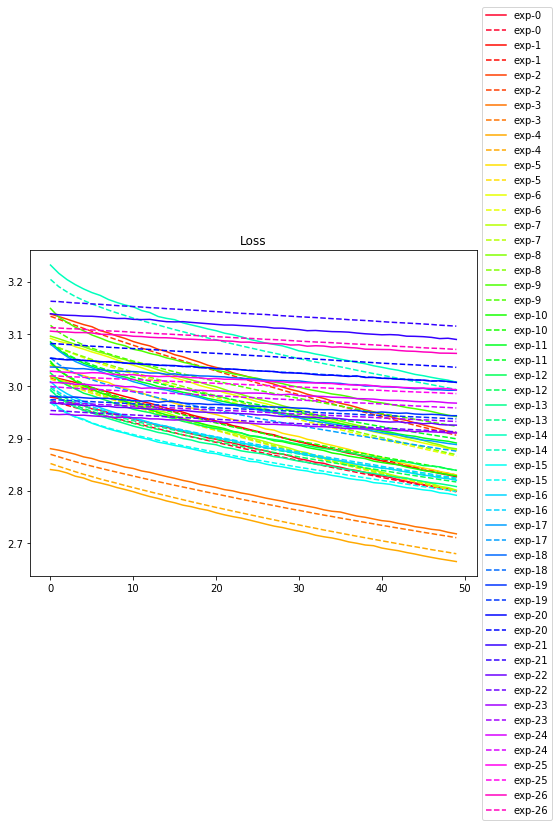

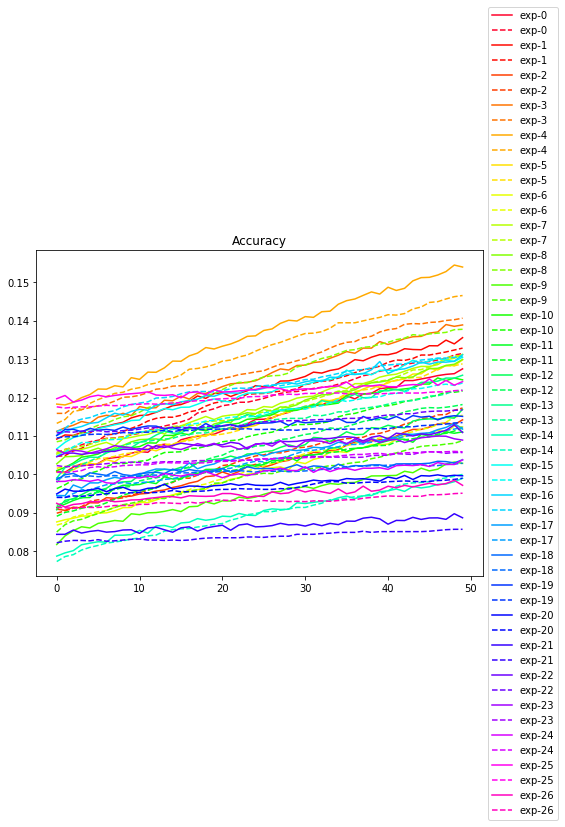

In [50]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'],'-', label=cond, c=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'],'--', label=cond, c=color_bar[i])
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'],'-', label=cond, c=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'],'--', label=cond, c=color_bar[i])
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
